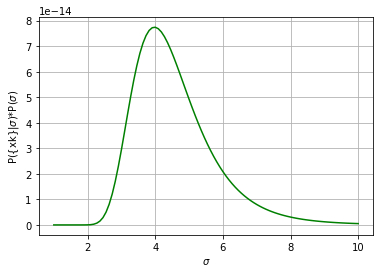

In [16]:
import numpy as np
import matplotlib.pylab as plt

xk = [2.031331588946557076,5.886777538940683563,2.195744759275823021,
      6.821886748452244298,8.793952398085184141E-1,2.951577398416659559,
      4.454332895499525158,-1.804396045394615955,-5.841925974092386120,-1.113495627653518838]

def L(xk,sigma):
    l = 1
    for x in xk:
        l *= np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))
    return l

LP = []
sigma = np.linspace(1,10,100)
for s in sigma:
    LP.append(L(xk,s))
LP = np.array(LP)/9

plt.figure()
plt.plot(sigma,LP,c='g')
plt.ylabel('P({xk}|$\sigma$)*P($\sigma$)')
plt.xlabel('$\sigma$')
plt.grid()
plt.savefig('like.png')

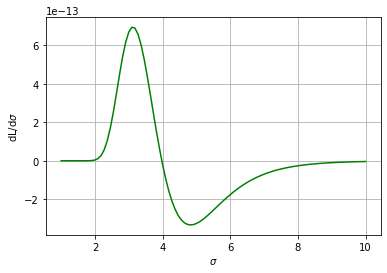

In [15]:
def cD(f,x,t):
    h = 0.05
    cd = (f(x,t+h/2)-f(x,t-h/2))/h
    return cd

dL = []
for s in sigma:
    dL.append(cD(L,xk,s))
    
plt.figure()
plt.plot(sigma,dL,c='g')
plt.ylabel('dL/d$\sigma$')
plt.xlabel('$\sigma$')
plt.grid()
plt.savefig('like_prime.png')

In [62]:
def newton(f,x,sigma):
    error = np.exp(-100)
    ds = 3*np.exp(-1)
    F = cD(f,x,sigma)
    while abs(F)>error:   
        df = (cD(f,x,sigma+ds/2)-cD(f,x,sigma-ds/2))/ds
        ds = -F/df
        sigma += ds
        F = cD(f,x,sigma)
    return sigma

print('dL/dsigma = 0, cuando sigma =',newton(L,xk,3.5))

dL/dsigma = 0, cuando sigma = 3.9761834913331557


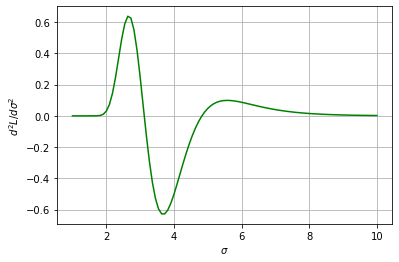

In [70]:
def gauss(a, b, f, k, N):
    integral = 0
    x0, w0 = np.polynomial.legendre.leggauss(N+1)
    x = (b+a)/2 + (b-a)*x0/2
    w = (b-a)*w0/2
    integral = sum(f(k,x)*w)
    return integral

def sD2(f,x,t):
    h = 0.05
    d = (f(x,t+h)+f(x,t-h)-2*f(x,t))/h**2
    return d

def L2(xk,sigma):
    l = L(xk,sigma)
    l /= gauss(1,9,L,xk,20)
    return l

d2L = []
for s in sigma:
    d2L.append(sD2(L2,xk,s))
    
plt.figure()
plt.plot(sigma,d2L,c='g')
plt.ylabel('$d^2L/d\sigma^2$')
plt.xlabel('$\sigma$')
plt.grid()
plt.savefig('like_prime_prime.png')